In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("bestsellers with categories.csv")

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
df.shape

(550, 7)

In [10]:
print("Про скільки книг зберігає дані датасет? Відповідь:", df.shape[0] )

Про скільки книг зберігає дані датасет? Відповідь: 550


In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [12]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [15]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [17]:
print("Чи є в якихось змінних пропуски? Відповідь:", bool(df.isnull().sum().sum()) )

Чи є в якихось змінних пропуски? Відповідь: False


In [21]:
pd.unique(df["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)

In [22]:
print("Які є унікальні жанри? Відповідь:", pd.unique(df["genre"]) )

Які є унікальні жанри? Відповідь: ['Non Fiction' 'Fiction']


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: price, dtype: float64

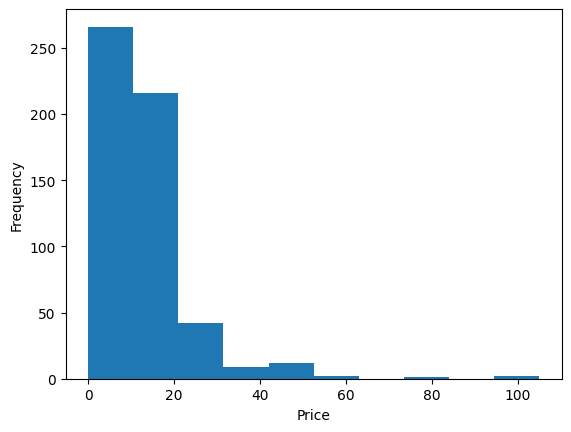

In [5]:
df["price"].plot(kind="hist", x="price", xlabel="Price")
df["price"].describe()

In [39]:
print("Максимальна ціна? Відповідь:", df["price"].max())
print("Мінімальна ціна? Відповідь:", df["price"].min())
print("Середня ціна? Відповідь:", df["price"].mean())
print("Медіанна ціна? Відповідь:", df["price"].median())

Максимальна ціна? Відповідь: 105
Мінімальна ціна? Відповідь: 0
Середня ціна? Відповідь: 13.1
Медіанна ціна? Відповідь: 11.0


In [115]:
df[(df["year"] == 2015) & (df["price"] < 8)].sort_values("price").iloc[-1].values[0]

'Old School (Diary of a Wimpy Kid #10)'

In [116]:
print("Який рейтинг у датасеті найвищий? Відповідь:", df["user_rating"].max())
print("Скільки книг мають такий рейтинг? Відповідь:", df[df["user_rating"]==df["user_rating"].max()].shape[0])
print("Яка книга має найбільше відгуків? Відповідь:", df[df["reviews"] == df["reviews"].max()]["name"].values[0])
tmp = df[df["year"] == 2015]
print("З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь:", tmp[tmp["price"] == tmp["price"].max()]["name"].values[0])
print("Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь:", df[(df["year"] == 2015) & (df["genre"] == "Fiction")].shape[0])
print("Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь:", df[((df["year"] == 2010) | (df["year"] == 2011)) & (df["user_rating"] == 4.9)].shape[0])
print("І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів")
print("Яка книга остання у відсортованому списку? Відповідь:", df[(df["year"] == 2015) & (df["price"] < 8)].sort_values("price").iloc[-1].values[0])

Який рейтинг у датасеті найвищий? Відповідь: 4.9
Скільки книг мають такий рейтинг? Відповідь: 52
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча? Відповідь: Publication Manual of the American Psychological Association, 6th Edition
Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році? Відповідь: 17
Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках? Відповідь: 1
І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів
Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


In [118]:
df.groupby("genre").agg({"price" : ["max", "min"]})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

In [6]:
df_author = df.groupby("author").agg({"name" : "count"})
df_author

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [180]:
print("Якої розмірності вийшла таблиця? Відповідь:", df_author.shape)
print("Який автор має найбільше книг? Відповідь:", df_author[df_author["name"] == df_author["name"].max()].index[0])
print("Скільки книг цього автора? Відповідь:", df_author[df_author["name"] == df_author["name"].max()].name[0])

Якої розмірності вийшла таблиця? Відповідь: (248, 1)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [7]:
df_rating = df.groupby("author").agg({"user_rating" : "mean"})
df_rating[df_rating["user_rating"] == df_rating["user_rating"].min()]

,user_rating
author,
Donna Tartt,3.9


In [186]:
print("У якого автора середній рейтинг мінімальний? Відповідь:", df_rating[df_rating["user_rating"] == df_rating["user_rating"].min()].index[0])
print("Який у цього автора середній рейтинг? Відповідь:", df_rating[df_rating["user_rating"] == df_rating["user_rating"].min()].user_rating[0])

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9


In [8]:
df_union = pd.concat([df_author, df_rating], axis=1)
df_union.sort_values(["name", "user_rating"])

,name,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [201]:
print("Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом. Який автор перший у списку? Відповідь:", df_union.sort_values(["name", "user_rating"]).iloc[0].name)

Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом. Який автор перший у списку? Відповідь: Muriel Barbery


In [9]:
df.shape

(550, 7)

<Axes: xlabel='year'>

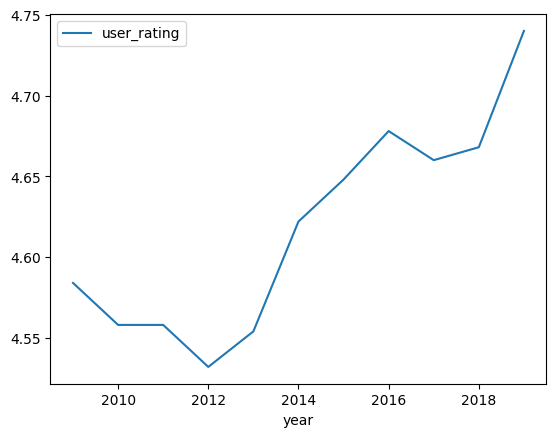

In [48]:
tmp = df.groupby("year").agg({"user_rating" : "mean"})
sns.lineplot(data=tmp)

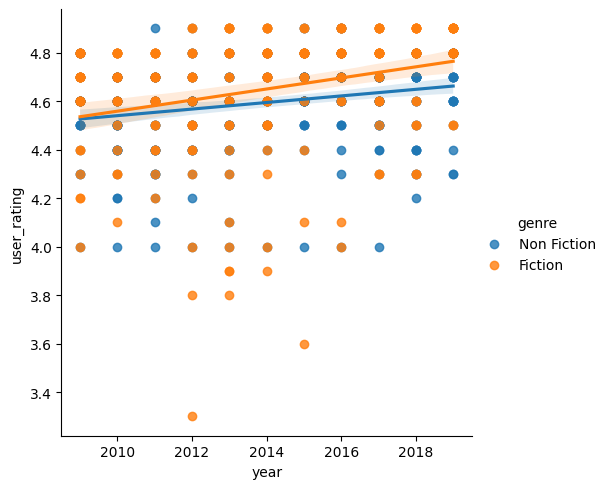

In [129]:
sns.lmplot(x="year", y="user_rating", hue="genre", data=df)

<Axes: xlabel='year'>

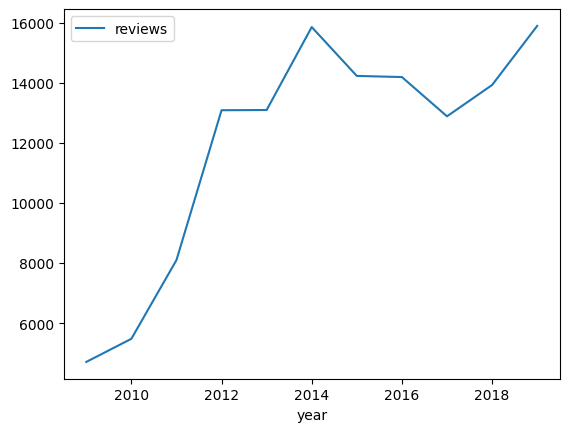

In [134]:
tmp3 = df.groupby("year").agg({"reviews" : "mean"})
sns.lineplot(data=tmp3)